In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Caricamento del dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Pre-elaborazione dei dati
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# Reshape per adattarsi ai layer convoluzionali
X_train = X_train.reshape(-1, 28, 28, 1)  # Aggiunta del canale per scala di grigi
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
# Conversione delle etichette in formato one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
# Creazione del modello CNN
model = Sequential()

In [8]:
# Primo layer convoluzionale e di pooling
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

c:\Users\curci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Secondo layer convoluzionale e di pooling
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# Flattening
model.add(Flatten())

In [11]:
# Layer denso
model.add(Dense(128, activation='relu'))

In [11]:
# Layer di output
model.add(Dense(10, activation='softmax'))

In [12]:
# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# Addestramento del modello
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9077 - loss: 0.3117 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9856 - loss: 0.0437 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9880 - val_loss: 0.0394
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9908 - val_loss: 0.0374
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9915 - val_loss: 0.0348
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9917 - val_loss: 0.0378
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9913 - val_loss: 0.0436
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9979 -

In [15]:
# Valutazione sul test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perdita sul test set: {test_loss:.4f}')
print(f'Accuratezza sul test set: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9882 - loss: 0.0471
Perdita sul test set: 0.0337
Accuratezza sul test set: 0.9914


In [16]:
# Predizione sul test set
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
# Conversione delle predizioni in etichette
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [18]:
# Matrice di confusione
conf_matrix = confusion_matrix(true_classes, predicted_classes)

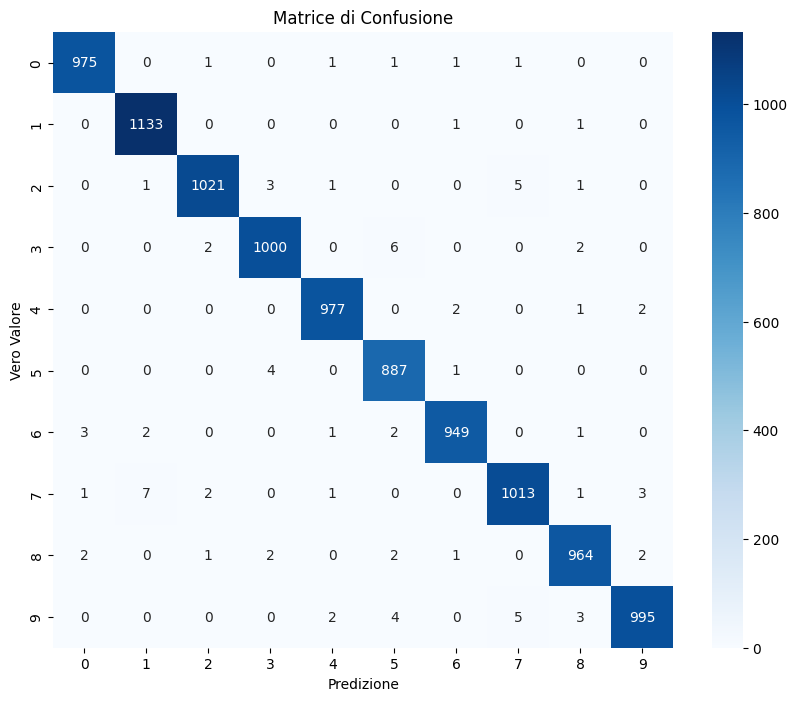

In [19]:
# Visualizzazione della matrice di confusione
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Predizione')
plt.ylabel('Vero Valore')
plt.show()

In [20]:
# Report di classificazione
report = classification_report(true_classes, predicted_classes)
print('Report di Classificazione:')
print(report)

Report di Classificazione:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



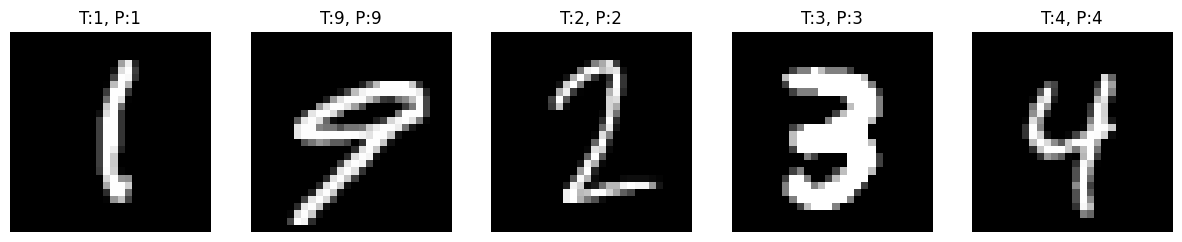

In [21]:
# Visualizzazione di alcune predizioni
num_images = 5
random_indices = np.random.choice(len(X_test), num_images)
plt.figure(figsize=(15,3))
for i, idx in enumerate(random_indices):
    image = X_test[idx].reshape(28, 28)
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    
    plt.subplot(1, num_images, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'T:{true_label}, P:{predicted_label}')
plt.show()